## INST 447 Assignment 2
### Research Question: Do people order different types of foods at different times of the day?
__By__: Dillon Morley\
__Class__: INST447 ESG1\
__Resources__: [InstaCartOrdersByDepartment-Spring2021.csv ](https://umd.instructure.com/courses/1299936/files/61697352?wrap=1)\
__Explanation of Dataset__:

Each row is a summary of orders associated with a particular hour in the day and a particular department:
- order_hour_of_day: The hour of the day when the order was placed (0 = 12am, 1 = 1am etc.)
- department: The department the products came from (e.g. alcohol, produce).
- num_orders_hour: The number of products ordered from this particular department during this particular hour.
- Tot_orders_dept: The total number of products ordered from this particular department across all hours of the day.

In [1]:
#Import modules needed for our analysis.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
%matplotlib inline

### Step 1: Read in the CSV file and Change Column Names
The goal of this research assignment was to analyze the csv file to see if people order different foods at different times of the day. The first step was to read in our CSV file containing our data, and then changing some column names for ease of use as we analyze the data.

In [2]:
insta = pd.read_csv('InstaCartOrdersByDepartment-Spring2021.csv',encoding='utf-8') #Read in the CSV file containing our Instacart data.
insta.columns = ['hour','department','order_per_hour','total_order'] #Changing the names of the columns for ease of use.
print(insta.head(10))#Displaying the first ten rows in our dataframe.

   hour department  order_per_hour  total_order
0     0    alcohol              53         5618
1     1    alcohol              32         5618
2     2    alcohol               5         5618
3     3    alcohol               3         5618
4     4    alcohol               2         5618
5     5    alcohol              12         5618
6     6    alcohol              34         5618
7     7    alcohol              92         5618
8     8    alcohol             161         5618
9     9    alcohol             343         5618


### Step 2: Analyze our Departments
The next step was to look at the data and see which departments in our dataset are non-food related. Looking at the list of departments, we can see that alcohol, babies, household, missing, other, personal care, and pets are all non-food related departments and should not be included in our dataset. 

In [3]:
department_list=list(insta['department'].unique()) #This code creates a list of all the departments contained within our dataset.
print(department_list) #Display our list of departments.

['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'produce', 'snacks']


### Step 3: Alter our Dataset
Next, we create a list of departments that aren't food related and filter out those departments from our dataset. We are also analyzing the different times of the day that these orders are placed. Due to the data displaying the orders based on each hour of the day I decided to break my hours down as following:
- Morning hours contains the orders that were placed between 5:00 am and 11:00 am. 
- Afternoon hours contains the orders that were placed between 12:00 pm and 5:00 pm. 
- Evening hours contains the orders that were placed between 6:00 pm and 9:00 pm. 
- Night hours contains the orders placed between 10:00 pm and 4:00 am.\

Using the function below, we can change our values for our hour column and filter out our non-food related departments.

In [4]:
non_food_departments = ['alcohol','babies','beverages','household','missing','other','personal care','pets']
morning = [5,6,7,8,9,10,11]
afternoon = [12,13,14,15,16,17]
evening = [18,19,20,21]
night = [22,23,0,1,2,3,4]

def value_change():
    
    insta.loc[insta['hour'].isin(morning),'hour'] = 'morning'
    insta.loc[insta['hour'].isin(afternoon),'hour'] = 'afternoon'
    insta.loc[insta['hour'].isin(evening),'hour'] = 'evening'
    insta.loc[insta['hour'].isin(night),'hour'] = 'night'
    insta.drop(insta.loc[insta['department'].isin(non_food_departments)].index,inplace=True)

value_change()

print(insta.head(10))

       hour department  order_per_hour  total_order
48    night     bakery             307        48411
49    night     bakery             175        48411
50    night     bakery             103        48411
51    night     bakery              75        48411
52    night     bakery              86        48411
53  morning     bakery             127        48411
54  morning     bakery             428        48411
55  morning     bakery            1285        48411
56  morning     bakery            2489        48411
57  morning     bakery            3356        48411


### Step 4: Group our Dataset to See Which Departments Sold The Most Items

Using the "groupby" function in the pandas library, I decided to group my data set by both department and total_order. This resulted in a new dataframe that I labeled department_totals, and I sorted my new dataframe to show the departments that sold the least amount to the most. As you can see, the department with the least items sold is our bulk department and the department with the most items sold is our produce department.

In [5]:
#This is a list of our departments in descending order, so we can see what departments sold the most items.
#We now have a general idea of which departments had more sales.
department_orders = insta.groupby(['department','total_order']).sum() #Creates a dataframe that is grouped by department and total_order.
department_totals = department_orders.sort_values(by='total_order',ascending=True).reset_index() #Sorts this dataframe by ascending order and resets our index.
department_totals.drop('order_per_hour',axis=1,inplace=True) #Deletes the order_per_hour column, so we just see our totals.
print(department_totals) #Prints the new dataframe.

         department  total_order
0              bulk         1380
1     international        11902
2         breakfast        29553
3      meat seafood        30307
4   dry goods pasta        38713
5              deli        44291
6      canned goods        47061
7            bakery        48411
8            pantry        81242
9            frozen       100426
10           snacks       118862
11       dairy eggs       218529
12          produce       409087


### Step 5: Create a New Dataframe for Hours of The Day
Using the "groupby" function again, I created a new dataframe called "time_group" that groups our dataset by both department and hour. The next step was to reshape our dataframe using the "pivot" function to create a wide view of our dataframe to see the different hours of the day as columns. This new view of our dataframe allows us to see each department in our dataframe as well as their correspoding number of orders for each section of the day.

In [6]:
time_group = insta.groupby(['department','hour']).sum().reset_index() #Creates dataframe that is grouped by department and hour.
time_group_wide = time_group.pivot(index='department',columns='hour',values='order_per_hour') #Creates a wide view of our dataframe with the times of the day as the columns.
timed_df = time_group_wide.reset_index() #Resets the index so we have indices instead of the departments.
timed_df = timed_df[['department','morning','afternoon','evening','night']] #Rearranged the columns to look more orderly.
print(timed_df) #Prints out our new dataframe

hour       department  morning  afternoon  evening  night
0              bakery    15370      23555     7336   2150
1           breakfast     9765      13807     4552   1429
2                bulk      434        644      217     85
3        canned goods    14890      23001     6888   2282
4          dairy eggs    71312     103593    33353  10271
5                deli    13601      21860     6749   2081
6     dry goods pasta    11639      19333     5940   1801
7              frozen    29081      49547    16869   4929
8       international     3538       5993     1774    597
9        meat seafood     9361      14971     4565   1410
10             pantry    25151      39900    12100   4091
11            produce   129824     197861    60530  20872
12             snacks    38270      57601    17598   5393


### Step 6: Merge our Two Dataframes
The last step with handling our data was to create a merged dataframe that combines our time dataframe as well as our department totals. Using the "merge" function in pandas, I created a merged dataset that merges on "department" and includes all the rows in common between the two. I also thought that it will be valuable to print out the total number of orders per hour of the day. This new dataframe shows us each department and their corresponding orders for each portion of the day, as well as their overall total orders. 

In [7]:
final_df = pd.merge(department_totals,timed_df, how='inner',on='department') #Creates the merged dataframe between department_totals and timed_df.
insta_cart_final = final_df[['department','morning','afternoon','evening','night','total_order']]#Rearranges the columns to be more visually pleasing.
print(insta_cart_final) #Print our new merged dataframe.

morning_total = insta_cart_final['morning'].sum() #Retrieves the number of orders placed in the morning
afternoon_total = insta_cart_final['afternoon'].sum() #Retrieves the number of orders placed in the afternoon
evening_total = insta_cart_final['evening'].sum() #Retrieves the number of orders placed in the evening
night_total = insta_cart_final['night'].sum() #Retrieves the number of orders placed in the night

print() #prints a blank row to seperate our dataframe and totals.
print('Morning Orders:',morning_total) #Prints the number of orders placed in the morning
print('Afternoon Orders:', afternoon_total) #Prints the number of orders placed in the afternoon
print('Evening Orders:',evening_total) #Prints the number of orders placed in the evening
print('Night Orders:',night_total) #Prints the number of orders placed in the night

         department  morning  afternoon  evening  night  total_order
0              bulk      434        644      217     85         1380
1     international     3538       5993     1774    597        11902
2         breakfast     9765      13807     4552   1429        29553
3      meat seafood     9361      14971     4565   1410        30307
4   dry goods pasta    11639      19333     5940   1801        38713
5              deli    13601      21860     6749   2081        44291
6      canned goods    14890      23001     6888   2282        47061
7            bakery    15370      23555     7336   2150        48411
8            pantry    25151      39900    12100   4091        81242
9            frozen    29081      49547    16869   4929       100426
10           snacks    38270      57601    17598   5393       118862
11       dairy eggs    71312     103593    33353  10271       218529
12          produce   129824     197861    60530  20872       409087

Morning Orders: 372236
Afternoon 

### Step 7: Create our First Visualization
I thought that it would be important to use two visualizations to show if people order different foods during different times of the day. The first visualization is a pie chart that breaks down the percentages of orders throughout the morning, afternoon, evening, and nighttime. I thought that including this visualization would be important to see the popular times of the day for people ordering food. It is evident that the majority of our orders we are analyzing were placed in the morning and afternoon. You can also see how small the percentage is for orders placed during the night.

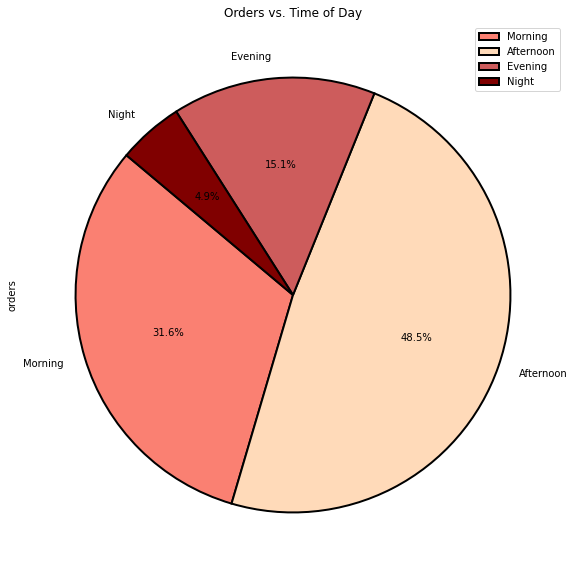

In [8]:
colors = ['salmon','peachpuff','indianred','maroon'] #Creates a list of colors to use in the pie chart
wedgeprops = {"linewidth": 2, 'width':1, "edgecolor":"k"} #Creates the outline of the wedges within the pie chart
time_orders = pd.DataFrame({'orders': [372236, 571666 , 178471,57391],}, #Manually creates a new dataframe containing our time period order numbers.
                  index=['Morning', 'Afternoon', 'Evening','Night'])
time_orders.plot.pie(y='orders',colors=colors,startangle=140,figsize=(10,10), autopct = "%0.1f%%",wedgeprops=wedgeprops); #Plots our pie chart with specific startangle, figsize, and autopct.
plt.title('Orders vs. Time of Day'); #Labels the pie chart Orders vs. Time of Day

### Step 8: Create our Final Visualization
The final visualization that I chose to represent if people order different types of food at different times of the day is a stacked horizontal bar chart. I felt that this was an effective way for me to portray the breakdown of each departments orders using colors to denote different times of the day. As you can see in the visualization, the most orders were placed in the afternoon for every department. There were no departments that had a drastic increase during certain hours of the day, and for the most part our data followed the same general trend as their total orders.

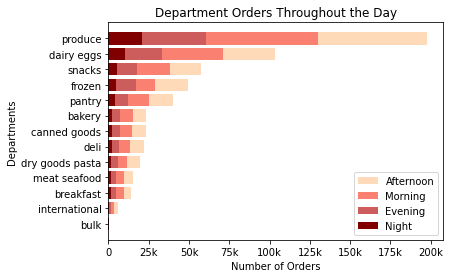

In [9]:
plt.barh(insta_cart_final['department'],insta_cart_final['afternoon'],color='peachpuff'); #Creates the peachpuff bar for afternoon orders
plt.barh(insta_cart_final['department'],insta_cart_final['morning'],color='salmon'); #Creates the salmon bar for morning orders
plt.barh(insta_cart_final['department'],insta_cart_final['evening'],color='indianred'); #Creates the indianred bar for evening orders
plt.barh(insta_cart_final['department'],insta_cart_final['night'],color='maroon'); #Creates the maroon bar for night time orders.
plt.legend(labels=['Afternoon','Morning','Evening','Night']); #Creates the legend to denote what each color means in our chart
plt.xticks([0,25000,50000,75000,100000,125000,150000,175000,200000], #Abbreviates our xticks
           ['0','25k','50k','75k','100k','125k','150k','175k','200k'])
plt.xlabel('Number of Orders'); #Labels our x-axis
plt.ylabel('Departments'); #Labels our y-axis
plt.title('Department Orders Throughout the Day'); #Gives our chart a title of "Department Orders Throughout the Day"

### Conclusion
After analyzing our Instacart dataset, it is evident that people do not order different foods at different times of the day. As seen in the graph above, no matter what portion of the day it is the products that people are ordering remain the same, as well as the order they are in. When I analyzed the different hours of the day, the top sold department for each portion of the day was produce, and for every department in our dataframe their top sales were during the afternoon period.

Using these results, a company like Instacart could identify which departments are their best sellers. Having knowledge on what departments sell the most could allow them to target their advertisements better. They could also use these results to potentially use association within their website to try and sell items together. For example, both produce and eggs are highly sought out departments, so advertising these together and including a reccommendations section could be beneficial.

Lastly, I think it is important to note that there are limitations within this dataset. There were missing values in this dataset that I excluded at the beginning. This dataset is also from 2017, so the numbers and general trends could have changed a lot over the past few years. Especially with the coronavirus pandemic, you could imagine that sales of items such as frozen foods would have a drastic increase.